# Attempt to use Linear Regression to Determine the Adjoint of a 3x3 matrix

This notebook is basic for running initial tests to learn about how feasible it is to determine the  of a 3x3 matrix by linear regression. We will attempt to perform linear regression for each cell of the  matrix, we will try to predict the value. We will determine the mean of rsquareds over all cells of the  matrix as a metric for how good a model is.

Test 1: linear regression between matrix elements and  matrix elements

Test 2: linear regression with test 1 and all possible combinations of one matrix element multiplied by every other 
        matrix element

Test 3: linear regression with test 2 and the square of each matrix element

Test 4: linear regression with test 1 and all possible combinations of one matrix element squared and multiplied by 
        every other matrix element and the cube of each matrix element

Note how Test 4 does not even use the parts of test 3 that included all possible combinations of one matrix element multiplied by every other matrix element - these are the tests I am reporting to demonstrate the importance of the aspect of test 4

Initially I had more tests to determine what tests had the best terms for a fit
I have condensed the list of tests

## Table of Contents
[1. Variable Setup](#Step-1:-Variable-setup) 

[2. Notebook Setup](#Step-2:-Notebook-setup) <br>

[3. Matrix and  Matrix EDA/Analysis](#Step-3:-Matrix-and--Matrix-EDA/Analysis) <br>

[4. Test 1 Single Cell of  Matrix And Linear Regression Analysis](#Step-4:-Single-Cell-Test-1-and-Linear-Regression-Analysis) <br>

[5. Test 1](#Step-5:-Test-1) <br>

[6. Test 2](#Step-6:-Test-2) <br>

[7. Test 3](#Step-7:-Test-3) <br>

[8. Test 4](#Step-8:-Test-4) <br>

[9. Conclusion](#Step-9:-Conclusion)

## Step 1: Variable setup
There are variables below to modify the parameters for the tests

random seed: how the engine generates the random set of matrices, each random seed will generate a different set of random matrices

minCellValue: the minimum value of each matrix element
maxCellValus: the maximum value of each matrix element

numMatricesToGenerate: the number of matrices to use, more matrices more reliable results, but longer execution time

integersOnly: to use integers only in the tests

digitsToRoundResults: for the printouts of the results, how many digits to show for the rounding of floating point numbers

cellToPerformSingleCellLinearRegressionAnalysisOn: For Test 1 We will show the parameters for Linear regresion, specify cell

In [141]:
randomSeed = 13099

minCellValue = 0

maxCellValue = 6

NumMatricesToGenerate = 3501

integersOnly = True

digitsToRoundResults = 4 

cellToPerformSingleCellLinearRegressionAnalysisOn = '00'

## Step 2: Notebook setup

In [142]:
#import libraries/setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
np.random.seed(randomSeed)

In [143]:
#variables to be used throughout this notebook
matrixSize = 3
listVar = list(range(matrixSize))
RangeMin = minCellValue - (maxCellValue-minCellValue)*100.0
RangeMax = maxCellValue + (maxCellValue-minCellValue)*100.0

In [186]:
#function to be used
def dropCols(dflm):
    dflm.drop('adjoint00', axis=1, inplace=True)
    dflm.drop('adjoint01', axis=1, inplace=True)
    dflm.drop('adjoint02', axis=1, inplace=True)
    dflm.drop('adjoint10', axis=1, inplace=True)
    dflm.drop('adjoint11', axis=1, inplace=True)
    dflm.drop('adjoint12', axis=1, inplace=True)
    dflm.drop('adjoint20', axis=1, inplace=True)
    dflm.drop('adjoint21', axis=1, inplace=True)
    dflm.drop('adjoint22', axis=1, inplace=True)
    dflm.drop('original', axis=1, inplace=True)
    dflm.drop('adjoint', axis=1, inplace=True)

In [145]:
import math as mth
# get cofactors matrix 
def getcofat(x):
    eps = 1e-6
    detx = np.linalg.det(x)
    if (mth.fabs(detx) < eps):
        print("No possible to get cofactors for singular matrix with this method")
        x = None
        return x
    invx = np.linalg.pinv(x)
    invxT = invx.T
    x = invxT * detx
    return x
# get adj matrix
def getadj(x):
    eps = 1e-6
    detx = np.linalg.det(x)
    if (mth.fabs(detx) < eps):
        print("No possible to get adj matrix for singular matrix with this method")
        adjx = None
        return adjx
    cofatx = getcofat(x)
    adjx = cofatx.T
    return adjx

In [146]:
#generate all matrices and their s, since not all matrices can be inverted

In [147]:
matList = []
i = 1
while i < NumMatricesToGenerate:
    if integersOnly: 
        matList.append(np.random.randint(minCellValue, maxCellValue+1, (matrixSize, matrixSize))) 
    else:
        matList.append(np.random.uniform(minCellValue, maxCellValue+1, (matrixSize, matrixSize))) 
    i += 1

In [148]:
#Try to invert all the matrices and then print out how many were invertible

In [153]:
invList = []
for x in matList:
    try:
        adjoint = getadj(x)
        if not adjoint is None:
            invList.append([x, adjoint])
    except np.linalg.LinAlgError:
    # Not invertible. Skip this one.
        pass

No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this me

No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this method
No possible to get adj matrix for singular matrix with this me

In [154]:
print(str(len(invList)) + " matrices were adjointable out of " + str(NumMatricesToGenerate) + " matrices")

3314 matrices were adjointable out of 3501 matrices


In [155]:
#convert to dataframe
df = pd.DataFrame(data=invList)
df.columns = ['original', 'adjoint']

In [156]:
#put each element of matrices and  to a column in dataframe and check the top 5 and bottom 5 elements of the dataframe
for i in listVar:
    for j in listVar:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in listVar:
    for j in listVar:
        df['adjoint'+str(i)+str(j)] = df.apply(lambda row: row['adjoint'][i][j], axis=1)
df

,original,adjoint,original00,original01,original02,original10,original11,original12,original20,original21,original22,adjoint00,adjoint01,adjoint02,adjoint10,adjoint11,adjoint12,adjoint20,adjoint21,adjoint22
0,"[[0, 6, 5], [3, 0, 3], [4, 5, 5]]","[[-14.999999999999998, -4.999999999999996, 17....",0,6,5,3,0,3,4,5,5,-15.0,-5.000000e+00,18.0,-3.0,-20.0,15.0,1.500000e+01,2.400000e+01,-18.0
1,"[[5, 2, 6], [6, 3, 0], [2, 4, 4]]","[[11.999999999999986, 16.000000000000004, -17....",5,2,6,6,3,0,2,4,4,12.0,1.600000e+01,-18.0,-24.0,8.0,36.0,1.800000e+01,-1.600000e+01,3.0
2,"[[0, 5, 4], [5, 6, 0], [2, 0, 1]]","[[6.000000000000006, -5.000000000000002, -23.9...",0,5,4,5,6,0,2,0,1,6.0,-5.000000e+00,-24.0,-5.0,-8.0,20.0,-1.200000e+01,1.000000e+01,-25.0
3,"[[5, 0, 6], [4, 4, 2], [0, 0, 2]]","[[7.999999999999997, 5.6894188250488284e-15, -...",5,0,6,4,4,2,0,0,2,8.0,5.689419e-15,-24.0,-8.0,10.0,14.0,3.014102e-15,-3.324629e-15,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,"[[5, 5, 2], [1, 4, 1], [5, 2, 0]]","[[-2.0, 4.000000000000002, -3.000000000000001]...",5,5,2,1,4,1,5,2,0,-2.0,4.000000e+00,-3.0,5.0,-10.0,-3.0,-1.800000e+01,1.500000e+01,15.0
3311,"[[0, 2, 5], [3, 6, 6], [1, 5, 4]]","[[-6.000000000000009, 17.000000000000014, -18....",0,2,5,3,6,6,1,5,4,-6.0,1.700000e+01,-18.0,-6.0,-5.0,15.0,9.000000e+00,2.000000e+00,-6.0
3312,"[[5, 3, 2], [4, 4, 4], [6, 4, 1]]","[[-12.00000000000001, 5.0000000000000036, 4.00...",5,3,2,4,4,4,6,4,1,-12.0,5.000000e+00,4.0,20.0,-7.0,-12.0,-8.000000e+00,-2.000000e+00,8.0
3313,"[[5, 3, 6], [6, 6, 6], [1, 1, 2]]","[[6.000000000000002, 1.7329334988160467e-15, -...",5,3,6,6,6,6,1,1,2,6.0,1.732933e-15,-18.0,-6.0,4.0,6.0,-3.880260e-16,-2.000000e+00,12.0


## Step 3: Matrix and  Matrix EDA/Analysis

In [157]:
df.describe()

,original00,original01,original02,original10,original11,original12,original20,original21,original22,adjoint00,adjoint01,adjoint02,adjoint10,adjoint11,adjoint12,adjoint20,adjoint21,adjoint22
count,3314.000000,3314.000000,3314.000000,3314.000000,3314.00000,3314.000000,3314.000000,3314.000000,3314.000000,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03,3.314000e+03
mean,3.026554,3.047073,3.009053,3.020821,3.01026,2.968316,3.061557,3.063669,2.996681,-2.474351e-02,-6.940253e-02,-1.297526e-02,8.690404e-02,4.978877e-02,6.578153e-02,-7.664454e-02,1.587206e-01,-2.073024e-01
std,1.980105,1.957028,1.993479,1.977504,2.00991,1.986650,2.004782,1.970624,1.987659,1.326425e+01,1.341459e+01,1.336721e+01,1.315501e+01,1.331395e+01,1.361006e+01,1.345479e+01,1.343808e+01,1.325280e+01
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-3.600000e+01,-3.600000e+01,-3.600000e+01,-3.600000e+01,-3.600000e+01,-3.600000e+01,-3.600000e+01,-3.600000e+01,-3.600000e+01
25%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-8.000000e+00,-8.000000e+00,-8.000000e+00,-8.000000e+00,-8.000000e+00,-8.000000e+00,-8.000000e+00,-8.000000e+00,-8.000000e+00
50%,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,-5.673971e-16,-5.226709e-16,-1.442604e-16,1.574687e-16,-1.035665e-16,2.547449e-16,2.968906e-16,9.978871e-17,-6.964691e-16
75%,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
max,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01


In [159]:
#Show the mean and standard deviation values for the adjoint matrices - Excluding the matrices that could not be inverted
#Show in printout of its own to highlight these extreme values without having to visualize the other information in the table above

In [161]:
print('the mean of cell 00 is: ' + str(np.round(df['adjoint00'].mean())))
print('the mean of cell 01 is: ' + str(np.round(df['adjoint01'].mean())))
print('the mean of cell 02 is: ' + str(np.round(df['adjoint02'].mean())))
print('the mean of cell 10 is: ' + str(np.round(df['adjoint10'].mean())))
print('the mean of cell 11 is: ' + str(np.round(df['adjoint11'].mean())))
print('the mean of cell 12 is: ' + str(np.round(df['adjoint12'].mean())))
print('the mean of cell 20 is: ' + str(np.round(df['adjoint20'].mean())))
print('the mean of cell 21 is: ' + str(np.round(df['adjoint21'].mean())))
print('the mean of cell 22 is: ' + str(np.round(df['adjoint22'].mean())))

the mean of cell 00 is: -0.0
the mean of cell 01 is: -0.0
the mean of cell 02 is: -0.0
the mean of cell 10 is: 0.0
the mean of cell 11 is: 0.0
the mean of cell 12 is: 0.0
the mean of cell 20 is: -0.0
the mean of cell 21 is: 0.0
the mean of cell 22 is: -0.0


In [163]:
print('the standard deviation of cell 00 values is: ' + str(np.round(df['adjoint00'].std(),digitsToRoundResults)))
print('the standard deviation of cell 01 values is: ' + str(np.round(df['adjoint01'].std(),digitsToRoundResults)))
print('the standard deviation of cell 02 values is: ' + str(np.round(df['adjoint02'].std(),digitsToRoundResults)))
print('the standard deviation of cell 10 values is: ' + str(np.round(df['adjoint10'].std(),digitsToRoundResults)))
print('the standard deviation of cell 11 values is: ' + str(np.round(df['adjoint11'].std(),digitsToRoundResults)))
print('the standard deviation of cell 12 values is: ' + str(np.round(df['adjoint12'].std(),digitsToRoundResults)))
print('the standard deviation of cell 20 values is: ' + str(np.round(df['adjoint20'].std(),digitsToRoundResults)))
print('the standard deviation of cell 21 values is: ' + str(np.round(df['adjoint21'].std(),digitsToRoundResults)))
print('the standard deviation of cell 22 values is: ' + str(np.round(df['adjoint22'].std(),digitsToRoundResults)))

the standard deviation of cell 00 values is: 13.2642
the standard deviation of cell 01 values is: 13.4146
the standard deviation of cell 02 values is: 13.3672
the standard deviation of cell 10 values is: 13.155
the standard deviation of cell 11 values is: 13.314
the standard deviation of cell 12 values is: 13.6101
the standard deviation of cell 20 values is: 13.4548
the standard deviation of cell 21 values is: 13.4381
the standard deviation of cell 22 values is: 13.2528


In [164]:
print('the max value of cell 00 values is: ' + str(min(df['adjoint00'])))
print('the min value of cell 00 values is: ' + str(max(df['adjoint00'])))
print('the max value of cell 01 values is: ' + str(min(df['adjoint01'])))
print('the min value of cell 01 values is: ' + str(max(df['adjoint01'])))
print('the max value of cell 02 values is: ' + str(min(df['adjoint02'])))
print('the min value of cell 02 values is: ' + str(max(df['adjoint02'])))
print('the max value of cell 10 values is: ' + str(min(df['adjoint10'])))
print('the min value of cell 10 values is: ' + str(max(df['adjoint10'])))
print('the max value of cell 11 values is: ' + str(min(df['adjoint11'])))
print('the min value of cell 11 values is: ' + str(max(df['adjoint11'])))
print('the max value of cell 12 values is: ' + str(min(df['adjoint12'])))
print('the min value of cell 12 values is: ' + str(max(df['adjoint12'])))
print('the max value of cell 20 values is: ' + str(min(df['adjoint20'])))
print('the min value of cell 20 values is: ' + str(max(df['adjoint20'])))
print('the max value of cell 21 values is: ' + str(min(df['adjoint21'])))
print('the min value of cell 21 values is: ' + str(max(df['adjoint21'])))
print('the max value of cell 22 values is: ' + str(min(df['adjoint22'])))
print('the min value of cell 22 values is: ' + str(max(df['adjoint22'])))

the max value of cell 00 values is: -36.000000000000064
the min value of cell 00 values is: 36.00000000000004
the max value of cell 01 values is: -36.00000000000004
the min value of cell 01 values is: 36.00000000000013
the max value of cell 02 values is: -36.00000000000006
the min value of cell 02 values is: 36.00000000000003
the max value of cell 10 values is: -36.00000000000013
the min value of cell 10 values is: 36.00000000000005
the max value of cell 11 values is: -36.00000000000008
the min value of cell 11 values is: 36.00000000000008
the max value of cell 12 values is: -36.000000000000036
the min value of cell 12 values is: 36.00000000000003
the max value of cell 20 values is: -36.000000000000696
the min value of cell 20 values is: 36.00000000000011
the max value of cell 21 values is: -36.000000000000476
the min value of cell 21 values is: 36.00000000000007
the max value of cell 22 values is: -36.00000000000008
the min value of cell 22 values is: 36.00000000000002


<b><font style='color:blue'>mean min max std all look fine for linear regression</font></b>

In [165]:
# Filter MAtrix Generated Data based on this formula (maxCellValue-minCellValue)*1000

<b><font style='color:blue'>OK well this removal should be fine, removing around 1.5% of the matrices from the set, very justified as values with numbers up to 10^32 (I have seen this in the min max results for different seeds) will destroy a linear regression. Generally this is very close to 1.5% when using different random seeds.</font></b>

In [166]:
#Check the standard deviations and means again

In [168]:
print('the mean of cell 00 is: ' + str(np.round(df['adjoint00'].mean(),digitsToRoundResults)))
print('the mean of cell 01 is: ' + str(np.round(df['adjoint01'].mean(),digitsToRoundResults)))
print('the mean of cell 02 is: ' + str(np.round(df['adjoint02'].mean(),digitsToRoundResults)))
print('the mean of cell 10 is: ' + str(np.round(df['adjoint10'].mean(),digitsToRoundResults)))
print('the mean of cell 11 is: ' + str(np.round(df['adjoint11'].mean(),digitsToRoundResults)))
print('the mean of cell 12 is: ' + str(np.round(df['adjoint12'].mean(),digitsToRoundResults)))
print('the mean of cell 20 is: ' + str(np.round(df['adjoint20'].mean(),digitsToRoundResults)))
print('the mean of cell 21 is: ' + str(np.round(df['adjoint21'].mean(),digitsToRoundResults)))
print('the mean of cell 22 is: ' + str(np.round(df['adjoint22'].mean(),digitsToRoundResults)))

the mean of cell 00 is: -0.0247
the mean of cell 01 is: -0.0694
the mean of cell 02 is: -0.013
the mean of cell 10 is: 0.0869
the mean of cell 11 is: 0.0498
the mean of cell 12 is: 0.0658
the mean of cell 20 is: -0.0766
the mean of cell 21 is: 0.1587
the mean of cell 22 is: -0.2073


In [169]:
print('the standard deviation of cell 00 values is: ' + str(np.round(df['adjoint00'].std(),digitsToRoundResults)))
print('the standard deviation of cell 01 values is: ' + str(np.round(df['adjoint01'].std(),digitsToRoundResults)))
print('the standard deviation of cell 02 values is: ' + str(np.round(df['adjoint02'].std(),digitsToRoundResults)))
print('the standard deviation of cell 10 values is: ' + str(np.round(df['adjoint10'].std(),digitsToRoundResults)))
print('the standard deviation of cell 11 values is: ' + str(np.round(df['adjoint11'].std(),digitsToRoundResults)))
print('the standard deviation of cell 12 values is: ' + str(np.round(df['adjoint12'].std(),digitsToRoundResults)))
print('the standard deviation of cell 20 values is: ' + str(np.round(df['adjoint20'].std(),digitsToRoundResults)))
print('the standard deviation of cell 21 values is: ' + str(np.round(df['adjoint21'].std(),digitsToRoundResults)))
print('the standard deviation of cell 22 values is: ' + str(np.round(df['adjoint22'].std(),digitsToRoundResults)))

the standard deviation of cell 00 values is: 13.2642
the standard deviation of cell 01 values is: 13.4146
the standard deviation of cell 02 values is: 13.3672
the standard deviation of cell 10 values is: 13.155
the standard deviation of cell 11 values is: 13.314
the standard deviation of cell 12 values is: 13.6101
the standard deviation of cell 20 values is: 13.4548
the standard deviation of cell 21 values is: 13.4381
the standard deviation of cell 22 values is: 13.2528


In [170]:
#Analysis

<b><font style='color:blue'>OK these means and standard deviations for inverted matrices is looking better, lets proceed with these s<br><br>It is interesting how the means of the  cells are close to 0</font></b>

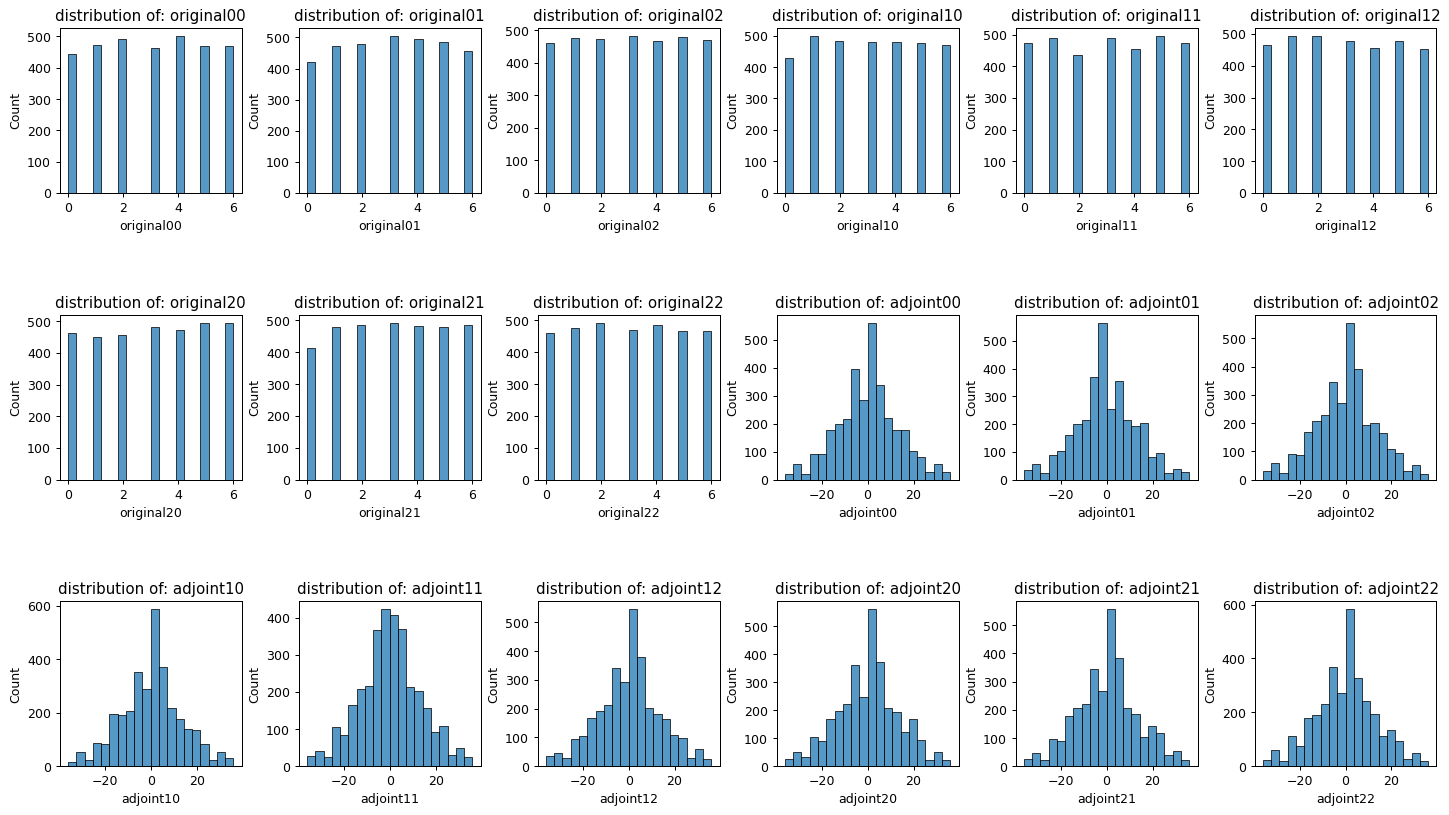

In [171]:
# let's check out the matrices cell values for  and randomly generated matrices

# use a 3x3 subplots layout, 16x9 aspect ratio
plt.subplots(3, 6, figsize=(16, 9), dpi=90)

# enumerate over column names
plot_df = df.copy()
plot_df.drop('original', axis=1, inplace=True)
plot_df.drop('adjoint', axis=1, inplace=True)
for i, column in enumerate(plot_df.columns, 1):

    # select a specific subplot canvas
    plt.subplot(3, 6, i)

    # plot histogram
    sns.histplot(data=plot_df, x=column, bins=20)

    # customise layout - add title and remove top+right borders
    plt.title("distribution of: " + column)

# add padding between subplots
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

In [172]:
#Analysis

The originals look as expected, the s seem to be centerred around 0

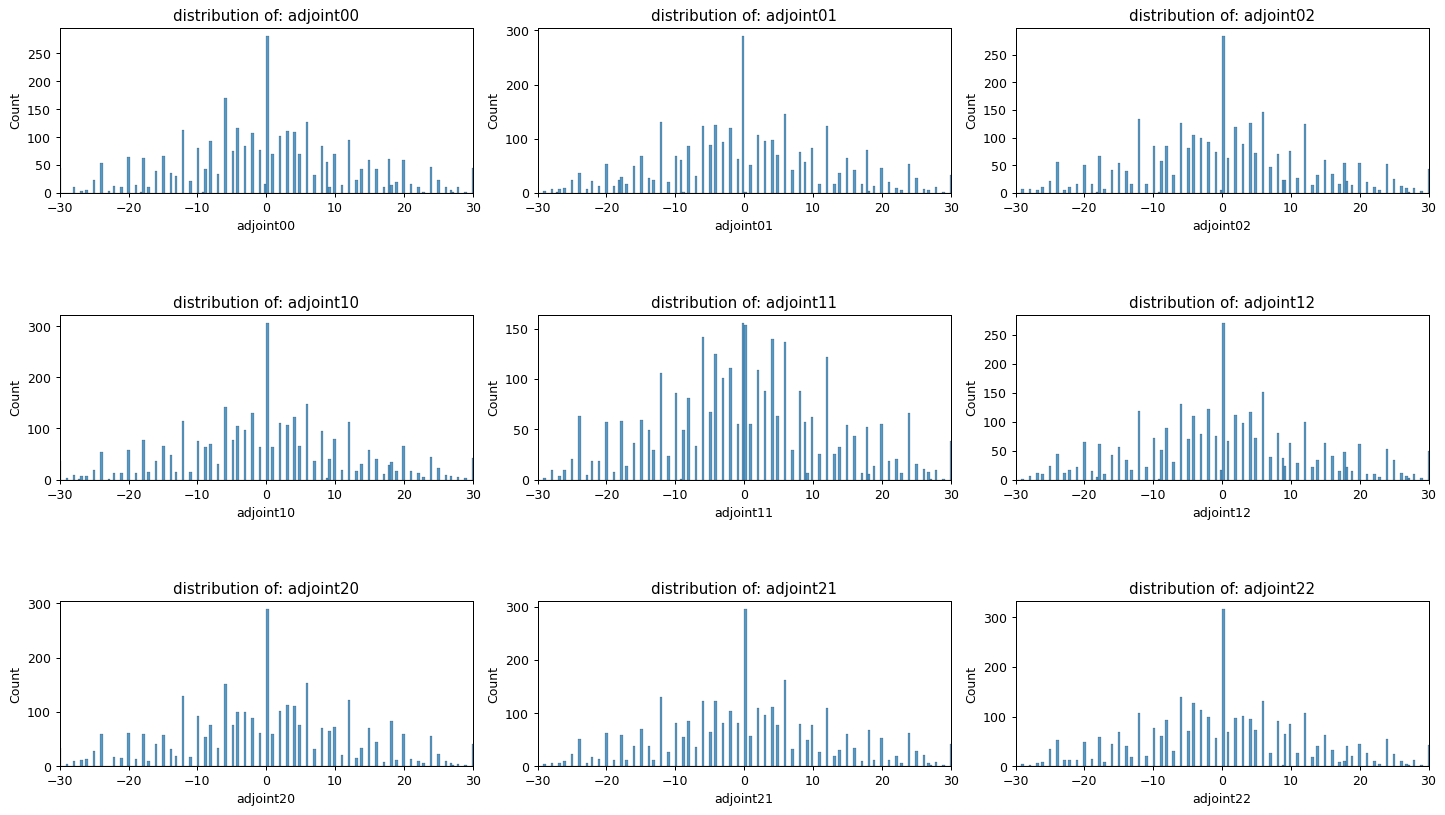

In [178]:
# let's look at the s in a narrower range
# use a 3x3 subplots layout, 16x9 aspect ratio
plt.subplots(3, 3, figsize=(16, 9), dpi=90)

# enumerate over column names
plot_df = plot_df.loc[:,~plot_df.columns.str.contains('original', case=True)] 

for i, column in enumerate(plot_df.columns, 1):

    # select a specific subplot canvas
    ax = plt.subplot(3, 3, i)

    # plot histogram
    sns.histplot(data=plot_df, x=column, bins=200)
    ax.set_xlim([-30,30])

    # customise layout - add title and remove top+right borders
    plt.title("distribution of: " + column)

# add padding between subplots
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)


In [179]:
#Analysis

Interesting how value tend to be normally distributed around 0 for all cells

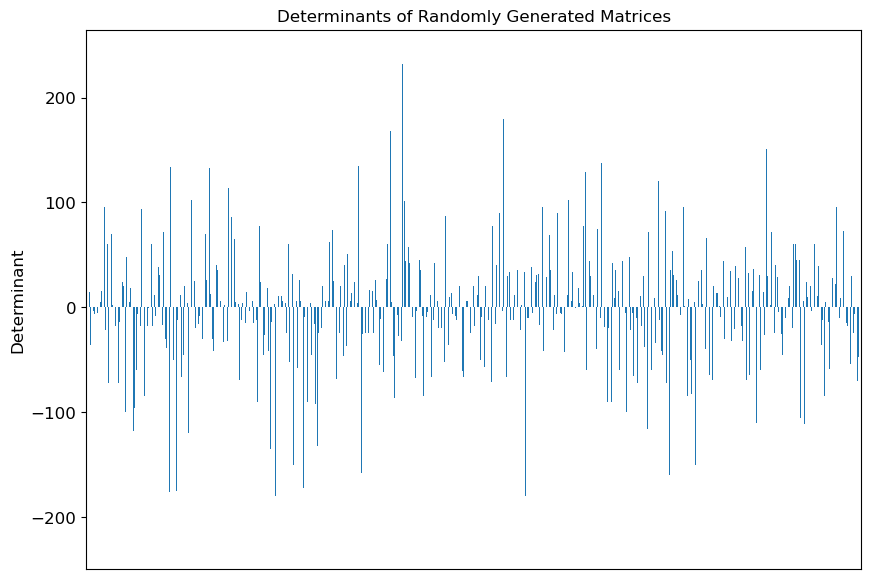

In [180]:
#make a histogram plat of determinants of randomly generated matrices
dets = df.apply(lambda row: np.linalg.det(row['original']), axis=1)
ax = dets.plot(kind='bar', title ="Determinants of Randomly Generated Matrices", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_ylabel("Determinant", fontsize=12)
ax.get_xaxis().set_visible(False)
plt.show()

In [181]:
#I wont perform more analysis on determinants, it is good to see though the range and the frequency

## Step 4: Single Cell Test 1 and Linear Regression Analysis

In [187]:
#Perform Linear Regression on a single cell - using the parameters of Test 1

dflm = df.copy()
y = dflm['adjoint' + cellToPerformSingleCellLinearRegressionAnalysisOn]
dropCols(dflm)
X = dflm[dflm.columns]
X_withconstant = sm.add_constant(X)
lm_cell = sm.OLS(y,X_withconstant)
lm_cell_results = lm_cell.fit()
lm_cell_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              adjoint00   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1637.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:04:21   Log-Likelihood:                -10457.
No. Observations:                3314   AIC:                         2.093e+04
Df Residuals:                    3304   BIC:                         2.099e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6064      0.475     -1.277      0.202      -1.537       0.324
original00    -0.0249      0.050     -0.499      0.618      -0.123       0.073
original01    -0.0143      0.051     -0.284      0.776      -0.113       0.085
original02    -0.0066      0.050     -0.134      0.894      -0.104       0.091
original10     0.0551      0.050      1.101      0.271      -0.043       0.153
original11     2.9843      0.049     60.652      0.000       2.888       3.081
original12    -3.0822      0.050    -61.929      0.000      -3.180      -2.985
original20     0.0517      0.049      1.049      0.294      -0.045       0.148
original21    -2.8616      0.050    -57.030      0.000      -2.960      -2.763
original22     3.1129      0.050     62.569      0.000       3.015       3.210
==============================================================================
Omnibus:                        1.038   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.984
Skew:                           0.038   Prob(JB):                        0.611
Kurtosis:                       3.035   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
#print model parameters
lm_cell_results.params

const        -0.606369
original00   -0.024933
original01   -0.014344
original02   -0.006628
                ...   
original12   -3.082249
original20    0.051743
original21   -2.861586
original22    3.112943
Length: 10, dtype: float64

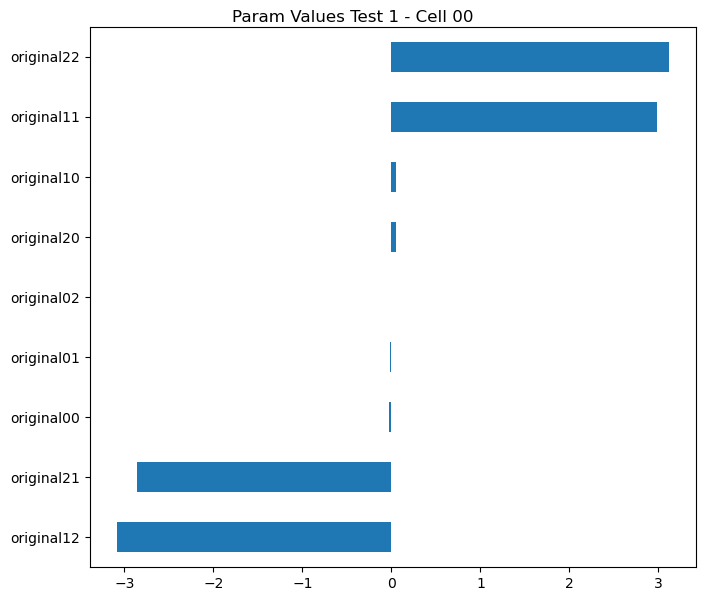

In [189]:
#plot of distribution of params
fig, ax = plt.subplots(1, 1, figsize=(7,6))
fig.suptitle('Param Values Test 1 - Cell '+cellToPerformSingleCellLinearRegressionAnalysisOn)
lm_cell_results.params[1:].sort_values().plot(kind="barh")
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

very interesting only 4 cells are important

In [190]:
print("R Squared value for the regression is: " + str(lm_cell_results.rsquared))

R Squared value for the regression is: 0.8167884288329936


<b><font style='color:blue'>The Coefficients for regression can be seen above. The coefficients are reasonable considering the ranges for the regression, unfortunately the rsquared value is to low for a matching regression. This is as expected for the values of an  matrix as each  is quite different and there is clearly not a great linear regression for going directly from a matrix to its .<br><br>R-squared (R2) is a statistical measure that represents the proportion of the variance for dependent variables that’s explained by an independent variable in a regression model. A higher R Squared means a better regression fit/model. Different applications have different requirements for R Squared value, a generally accepted metric is 0.2 <br><br>Different random seeds (different randomly generated original matrices) will produce different results but they tend to be around 0.015 <br><br>An automated analysis of different sets of randomly generated matrices will be performed in the next Notebook</font></b>

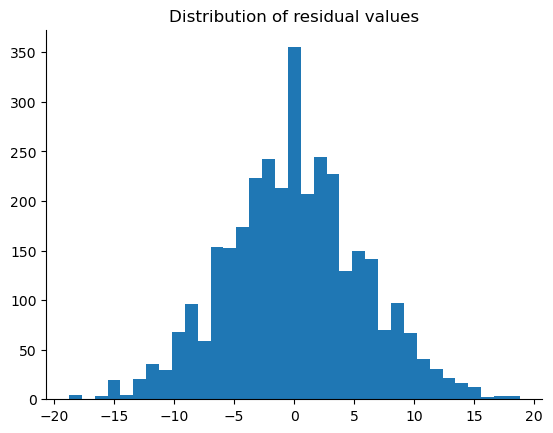

In [191]:
# Plotting the residuals of the model 3.1.2
plt.figure()
plt.hist(lm_cell_results.resid, bins = 35)
plt.title('Distribution of residual values')
sns.despine()
plt.show()

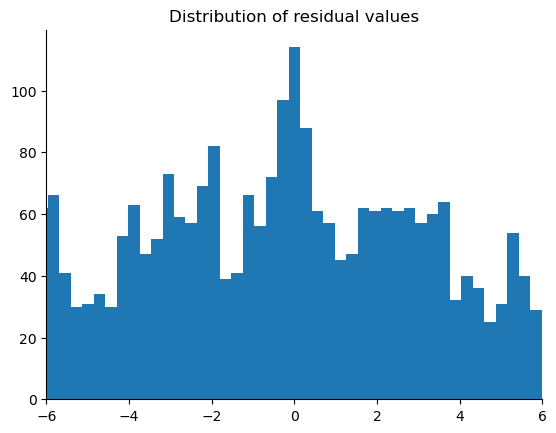

In [192]:
# Plotting the residuals of the model 3.1.2
plt.figure()
plt.hist(lm_cell_results.resid, bins = 135)
plt.title('Distribution of residual values')
sns.despine()
plt.xlim([-6,6])
plt.show()

The residual plot is not normally distributed so the error is random

In [193]:
# calculating the shapiro test statisic and its p-value
print("Shapiro-Wilk Test: ", stats.shapiro(lm_cell_results.resid))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.9987481832504272, pvalue=0.01362783182412386)


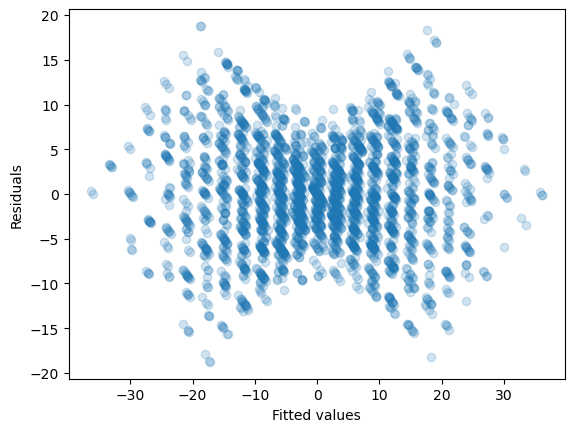

In [194]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(lm_cell_results.fittedvalues, lm_cell_results.resid, alpha=0.2)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

This graph indicates that the p value cannot be trusted since the variance does not increase as the fitted values increase so the regression is not reliable

it would be better to do this for all random seeds/cells/tests but that would be overkill/too many plots

further analysis will be of rsquared values accross all cells to investigate validity of linear regression for matrix inversion

## Step 5: Test 1

In [196]:
#do a linear regression for each cell of the matrix  and show params to verify the regressions 
#a complete regression analysis for each cell is above, we are merely verifying that the regressions generated are reasonable
#and that there are no coding errors

test1fit = []
test1fitstderr = []
dflm = df.copy()

for i in listVar:
    for j in listVar:
        dflm = df.copy()
        y = dflm['adjoint'+str(i)+str(j)]
        dropCols(dflm)
        X = dflm[dflm.columns]
        X_withconstant = sm.add_constant(X)
        lm = sm.OLS(y,X_withconstant)
        fit = lm.fit()
        print(fit.params)
        test1fit.append([ str(i)+" "+str(j),fit.rsquared])
        test1fitstderr.append([ str(i)+" "+str(j),fit.bse])
        

const        -0.606369
original00   -0.024933
original01   -0.014344
original02   -0.006628
                ...   
original12   -3.082249
original20    0.051743
original21   -2.861586
original22    3.112943
Length: 10, dtype: float64
const        -0.216213
original00   -0.024807
original01   -3.066184
original02    3.061971
                ...   
original12    0.089638
original20   -0.069843
original21    3.069885
original22   -3.079260
Length: 10, dtype: float64
const         0.644730
original00    0.048776
original01    2.888799
original02   -3.075972
                ...   
original12    2.994829
original20   -0.008716
original21   -0.078184
original22   -0.074814
Length: 10, dtype: float64
const        -0.684195
original00    0.043631
original01   -0.040390
original02    0.075790
                ...   
original12    3.101006
original20    2.985338
original21    0.016023
original22   -3.017371
Length: 10, dtype: float64
const         0.324250
original00    3.032742
original01    0.05

<b><font style='color:blue'>The params are near 0 and they are similar to the single cell analysis done above</font></b>

In [197]:
cellList = []  
test1fitlist = []
test1fitliststderr = []
for x in test1fit:
    cellList.append(x[0])
    test1fitlist.append(x[1])
    
for x in test1fitstderr:
    test1fitliststderr.append(x[1])
    
        
test1df = pd.DataFrame.from_dict({
    'Cell': cellList,
    'RSquaredFit': test1fitlist
})

test1dfstderr = pd.DataFrame.from_dict({
    'Cell': cellList,
    'StdErr': test1fitliststderr
})

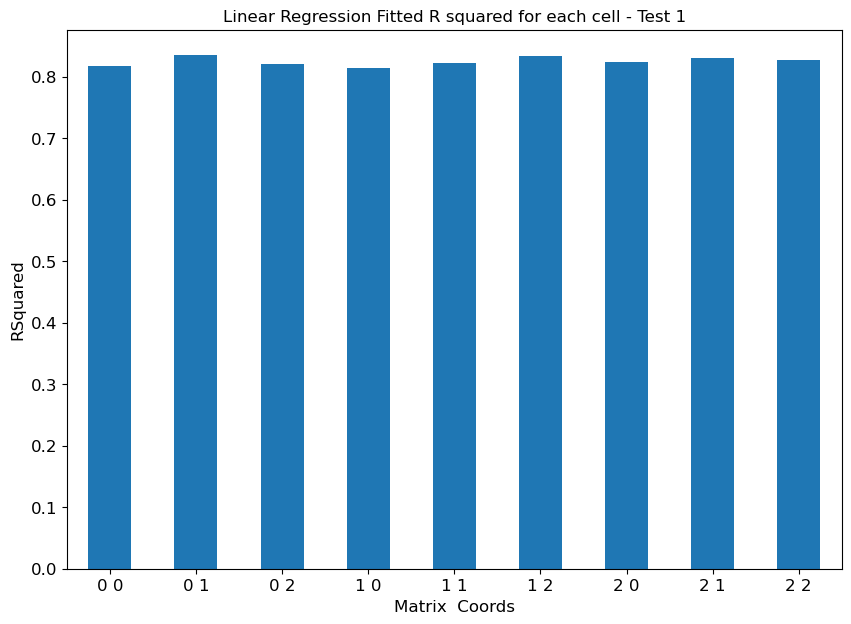

Generated RSquared values for Linear Regression each  element -> the mean of these values: 0.825
Generated RSquared values for Linear Regression each  element -> the Standard Deviation of these values: 0.0072


In [198]:
#plot the rsquared values for each cell for the last linear regression, and display means and standard variations accross cells
ax = test1df.plot(kind='bar', title ="Linear Regression Fitted R squared for each cell - Test 1", x="Cell", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_xlabel("Matrix  Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

Test1mean = pd.DataFrame(test1fit, columns=['Matrix  Coords', 'RSquared']).loc[:, 'RSquared'].mean()
Test1std = pd.DataFrame(test1fit, columns=['Matrix  Coords', 'RSquared']).loc[:, 'RSquared'].std() 

print('Generated RSquared values for Linear Regression each  element -> the mean of these values: ' + str(np.round(Test1mean,digitsToRoundResults)))
print('Generated RSquared values for Linear Regression each  element -> the Standard Deviation of these values: ' + str(np.round(Test1std,digitsToRoundResults)))

<b><font style='color:blue'>R-squared (R2) is a statistical measure that represents the proportion of the variance for dependent variables that’s explained by an independent variable in a regression model. A higher R Squared means a better regression fit/model. Different applications have different requirements for R Squared value, a generally accepted metric is 0.2</font></b>

<b><font style='color:blue'>This graph shows how the r squared values vary by cell</font></b>

## Step 6: Test 2

In [199]:
# Test 2 - linear regression with test 1 and all possible combinations of one matrix element multiplied by every other 
# matrix element

dflm = df.copy()

for i in listVar:
    for j in listVar:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
dflm = dflm.drop('original00x00', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
dflm = dflm.drop('original01x01', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
dflm = dflm.drop('original02x02', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
dflm = dflm.drop('original10x10', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
dflm = dflm.drop('original11x11', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
dflm = dflm.drop('original12x12', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
dflm = dflm.drop('original20x20', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
dflm = dflm.drop('original21x21', axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
dflm = dflm.drop('original22x22', axis=1)
  

In [200]:
dflm.describe()

,original00,original01,original02,original10,original11,original12,original20,original21,original22,adjoint00,...,original21x20,original21x22,original22x00,original22x01,original22x02,original22x10,original22x11,original22x12,original22x20,original22x21
count,3314.000000,3314.000000,3314.000000,3314.000000,3314.00000,3314.000000,3314.000000,3314.000000,3314.000000,3.314000e+03,...,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000
mean,3.026554,3.047073,3.009053,3.020821,3.01026,2.968316,3.061557,3.063669,2.996681,-2.474351e-02,...,9.258298,9.151177,9.151177,9.185576,8.905552,8.992758,9.043452,8.977067,9.245323,9.151177
std,1.980105,1.957028,1.993479,1.977504,2.00991,1.986650,2.004782,1.970624,1.987659,1.326425e+01,...,9.424985,9.319678,9.431041,9.391361,9.266772,9.207109,9.430729,9.393248,9.541837,9.319678
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-3.600000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-8.000000e+00,...,0.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,-5.673971e-16,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,8.000000e+00,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
max,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,3.600000e+01,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000


In [201]:
dflm.columns

Index(['original', 'adjoint', 'original00', 'original01', 'original02',
       'original10', 'original11', 'original12', 'original20', 'original21',
       'original22', 'adjoint00', 'adjoint01', 'adjoint02', 'adjoint10',
       'adjoint11', 'adjoint12', 'adjoint20', 'adjoint21', 'adjoint22',
       'original00x01', 'original00x02', 'original00x10', 'original00x11',
       'original00x12', 'original00x20', 'original00x21', 'original00x22',
       'original01x00', 'original01x02', 'original01x10', 'original01x11',
       'original01x12', 'original01x20', 'original01x21', 'original01x22',
       'original02x00', 'original02x01', 'original02x10', 'original02x11',
       'original02x12', 'original02x20', 'original02x21', 'original02x22',
       'original10x00', 'original10x01', 'original10x02', 'original10x11',
       'original10x12', 'original10x20', 'original10x21', 'original10x22',
       'original11x00', 'original11x01', 'original11x02', 'original11x10',
       'original11x12', 'origin

The generated data is correct and matches the parameters for test2

In [206]:
#Test 2 regressions - and print params to verify regressions
params = []
test2fit = []

for i in listVar:
    for j in listVar:
        dfl = dflm.copy()
        y = dfl['adjoint'+str(i)+str(j)]
        dropCols(dfl)
        X = dfl[dfl.columns]
        X_withconstant = sm.add_constant(X)
        lm = sm.OLS(y,X_withconstant)
        fit2 = lm.fit()
        if i==0 and j==0:
            pd.set_option('display.max_rows', 999)
            print(fit2.params)
        else:
            pd.set_option('display.max_rows', 9)
            print(fit2.params)
        params.append([str(i)+str(j),fit2.params.loc[lambda x : x>0.001]])
        test2fit.append([ str(i)+" "+str(j),fit2.rsquared])

const           -3.289209e-14
original00       4.710479e-15
original01       4.234026e-15
original02       3.195361e-15
original10       6.869505e-16
original11       4.321630e-15
original12       7.145760e-15
original20       7.962381e-16
original21       1.413800e-15
original22       1.556047e-15
original00x01    9.271623e-17
original00x02    3.448847e-16
original00x10    2.100642e-17
original00x11    6.556713e-17
original00x12   -1.037853e-16
original00x20    6.917210e-17
original00x21    4.477755e-17
original00x22    1.474515e-17
original01x00    4.179599e-17
original01x02   -7.021988e-17
original01x10   -1.263502e-16
original01x11   -2.305556e-16
original01x12    2.145772e-16
original01x20   -2.932733e-16
original01x21    1.975958e-17
original01x22    3.000258e-16
original02x00    3.661351e-16
original02x01    9.310501e-17
original02x10    1.514630e-16
original02x11   -2.219362e-16
original02x12   -2.360308e-16
original02x20   -6.332418e-17
original02x21    2.455176e-16
original02

In [207]:
print(params)

[['00', original11x22    0.5
original22x11    0.5
dtype: float64], ['01', original02x21    0.5
original21x02    0.5
dtype: float64], ['02', original01x12    0.5
original12x01    0.5
dtype: float64], ['10', original12x20    0.5
original20x12    0.5
dtype: float64], ['11', original00x22    0.5
original22x00    0.5
dtype: float64], ['12', original02x10    0.5
original10x02    0.5
dtype: float64], ['20', original10x21    0.5
original21x10    0.5
dtype: float64], ['21', original01x20    0.5
original20x01    0.5
dtype: float64], ['22', original00x11    0.5
original11x00    0.5
dtype: float64]]


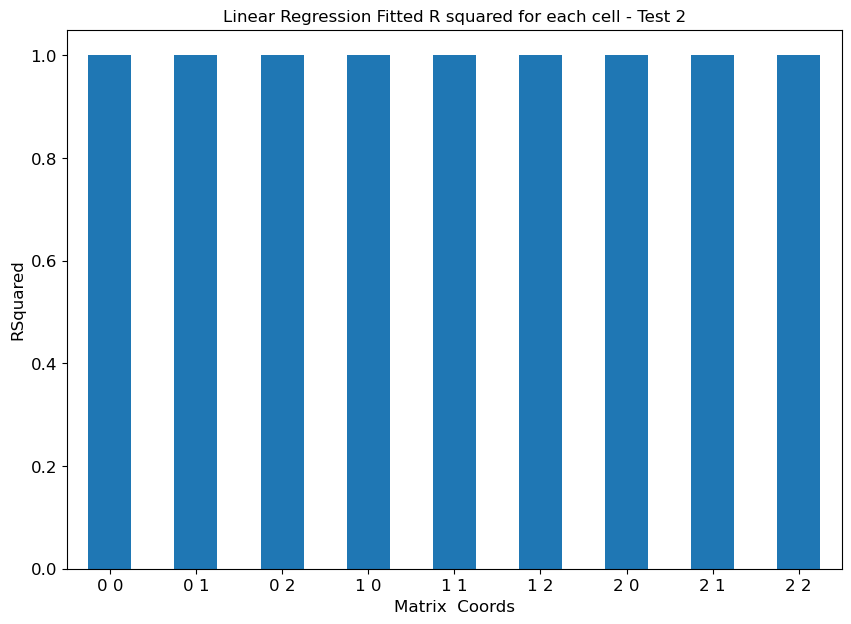

Generated RSquared values for Linear Regression each  element -> the mean of these values: 1.0
Generated RSquared values for Linear Regression each  element -> the Standard Deviation of these values: 0.0


In [208]:
#plot the r squared values
cellList = []  
test2fitlist = []
for x in test2fit:
    cellList.append(x[0])
    test2fitlist.append(x[1])
        
test2df = pd.DataFrame.from_dict({
    'Cell': cellList,
    'RSquaredFit': test2fitlist
})

ax = test2df.plot(kind='bar', title ="Linear Regression Fitted R squared for each cell - Test 2", x="Cell", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_xlabel("Matrix  Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

Test2mean = pd.DataFrame(test2fit, columns=['Matrix  Coords', 'RSquared']).loc[:, 'RSquared'].mean()
Test2std = pd.DataFrame(test2fit, columns=['Matrix  Coords', 'RSquared']).loc[:, 'RSquared'].std() 

print('Generated RSquared values for Linear Regression each  element -> the mean of these values: ' + str(np.round(Test2mean,digitsToRoundResults)))
print('Generated RSquared values for Linear Regression each  element -> the Standard Deviation of these values: ' + str(np.round(Test2std,digitsToRoundResults)))

In [209]:
#Analysis

<b><font style='color:blue'>Test 2 does not produce a sufficient rsquared value for a linear regression - However almost a double in r squared values from Test 1. Different sets of matrices produce different results but generally the mean is about 0.025<br><br>The mean for Test 1 was about 0.015

## Step 7: Test 3

In [212]:
#Test 3 - linear regression with test 2 and the square of each matrix element - the code is very similar to test 2 code
#without the sqaured terms being removed

dflm = df.copy()

for i in listVar:
    for j in listVar:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['adjoint'+str(i)+str(j)] = dflm.apply(lambda row: row['adjoint'][i][j], axis=1)

for i in listVar:
    for j in listVar:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
  

In [213]:
dflm.describe()

,original00,original01,original02,original10,original11,original12,original20,original21,original22,adjoint00,...,original21x22,original22x00,original22x01,original22x02,original22x10,original22x11,original22x12,original22x20,original22x21,original22x22
count,3314.000000,3314.000000,3314.000000,3314.000000,3314.00000,3314.000000,3314.000000,3314.000000,3314.000000,3.314000e+03,...,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000,3314.000000
mean,3.026554,3.047073,3.009053,3.020821,3.01026,2.968316,3.061557,3.063669,2.996681,-2.474351e-02,...,9.151177,9.151177,9.185576,8.905552,8.992758,9.043452,8.977067,9.245323,9.151177,12.929692
std,1.980105,1.957028,1.993479,1.977504,2.00991,1.986650,2.004782,1.970624,1.987659,1.326425e+01,...,9.319678,9.431041,9.391361,9.266772,9.207109,9.430729,9.393248,9.541837,9.319678,12.432597
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-3.600000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-8.000000e+00,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,-5.673971e-16,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,9.000000
75%,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,8.000000e+00,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,25.000000
max,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,3.600000e+01,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000


In [214]:
dflm.columns

Index(['original', 'adjoint', 'original00', 'original01', 'original02',
       'original10', 'original11', 'original12', 'original20', 'original21',
       ...
       'original21x22', 'original22x00', 'original22x01', 'original22x02',
       'original22x10', 'original22x11', 'original22x12', 'original22x20',
       'original22x21', 'original22x22'],
      dtype='object', length=101)

In [218]:
test3fit = []
params = []

dflm3 = dflm.copy()

for i in listVar:
    for j in listVar:
        dfl = dflm3.copy()
        y = dfl['adjoint'+str(i)+str(j)]
        dropCols(dfl)
        X = dfl[dfl.columns]
        X_withconstant = sm.add_constant(X)
        lm = sm.OLS(y,X_withconstant)
        fit3 = lm.fit()
        if i==0 and j==0:
            pd.set_option('display.max_rows', 999)
            print(fit3.params)
        else:
            pd.set_option('display.max_rows', 9)
            print(fit3.params)
        test3fit.append([ str(i)+" "+str(j),fit3.rsquared])
        params.append([str(i)+str(j),fit2.params.loc[lambda x : x>0.001]])

const           -3.257117e-14
original00       3.463701e-15
original01      -1.706968e-15
original02       5.235395e-15
original10       9.783840e-16
original11       5.821732e-15
original12      -1.726050e-15
original20       1.793704e-15
original21       9.570469e-15
original22       3.923077e-15
original00x00   -1.207395e-16
original00x01    3.906008e-17
original00x02   -2.969630e-16
original00x10    5.487418e-16
original00x11    1.111307e-16
original00x12    3.901502e-16
original00x20    1.385610e-16
original00x21   -6.675433e-16
original00x22   -1.210512e-16
original01x00    1.834157e-16
original01x01   -1.376937e-17
original01x02    4.537505e-16
original01x10    1.253880e-16
original01x11    3.674903e-16
original01x12    2.042230e-16
original01x20   -2.326088e-16
original01x21   -2.222886e-16
original01x22    3.514035e-16
original02x00   -2.480655e-16
original02x01    4.011091e-16
original02x02   -1.990595e-16
original02x10    1.664250e-16
original02x11   -2.419939e-16
original02

In [219]:
print(params)

[['00', original00x11    0.5
original11x00    0.5
dtype: float64], ['01', original00x11    0.5
original11x00    0.5
dtype: float64], ['02', original00x11    0.5
original11x00    0.5
dtype: float64], ['10', original00x11    0.5
original11x00    0.5
dtype: float64], ['11', original00x11    0.5
original11x00    0.5
dtype: float64], ['12', original00x11    0.5
original11x00    0.5
dtype: float64], ['20', original00x11    0.5
original11x00    0.5
dtype: float64], ['21', original00x11    0.5
original11x00    0.5
dtype: float64], ['22', original00x11    0.5
original11x00    0.5
dtype: float64]]


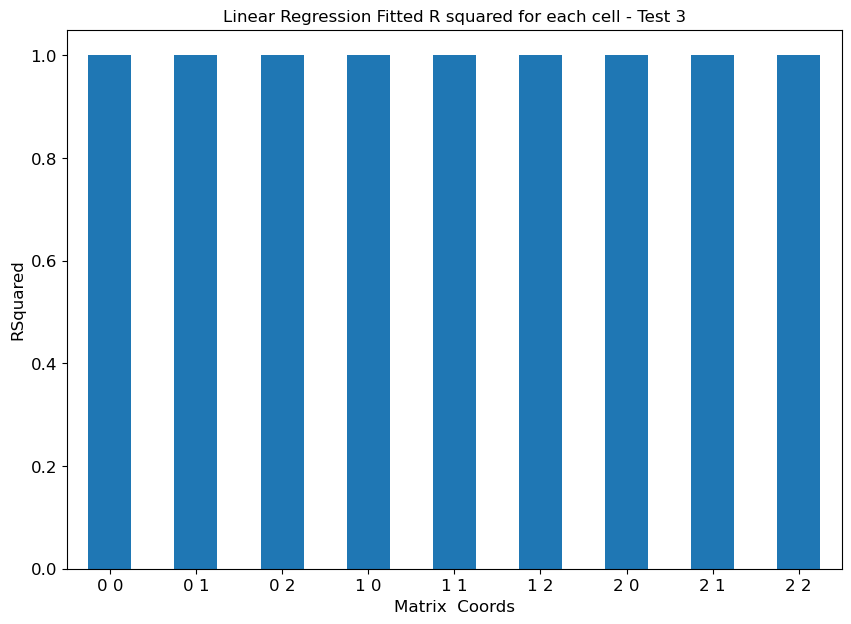

Generated RSquared values for Linear Regression each  element -> the mean of these values: 1.0
Generated RSquared values for Linear Regression each  element -> the Standard Deviation of these values: 0.0


In [220]:
cellList = []  
test3fitlist = []
for x in test3fit:
    cellList.append(x[0])
    test3fitlist.append(x[1])
        
test3df = pd.DataFrame.from_dict({
    'Cell': cellList,
    'RSquaredFit': test3fitlist
})

ax = test3df.plot(kind='bar', title ="Linear Regression Fitted R squared for each cell - Test 3", x="Cell", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_xlabel("Matrix  Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

Test3mean = pd.DataFrame(test3fit, columns=['Matrix  Coords', 'RSquared']).loc[:, 'RSquared'].mean()
Test3std = pd.DataFrame(test3fit, columns=['Matrix  Coords', 'RSquared']).loc[:, 'RSquared'].std() 

print('Generated RSquared values for Linear Regression each  element -> the mean of these values: ' + str(np.round(Test3mean,digitsToRoundResults)))
print('Generated RSquared values for Linear Regression each  element -> the Standard Deviation of these values: ' + str(np.round(Test3std,digitsToRoundResults)))

In [221]:
#Analysis

<b><font style='color:blue'>Test 3 does not produce a sufficient rsquared value for a linear regression - However a better R squared average then test 2. Different sets of matrices produce different results but generally the mean is about 0.028<br><br>The mean for Test 2 is around 0.025

## Step 8: Test 4

In [224]:
# Test 4
dflm = df.copy()

for i in listVar:
    for j in listVar:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['adjoint'+str(i)+str(j)] = dflm.apply(lambda row: row['adjoint'][i][j], axis=1)

        
for i in listVar:
    for j in listVar:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0] * row['original'][0][0] , axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1] * row['original'][0][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2] * row['original'][0][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0] * row['original'][1][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1] * row['original'][1][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2] * row['original'][1][2], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0] * row['original'][2][0], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1] * row['original'][2][1], axis=1)
        
for i in listVar:
    for j in listVar:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2] * row['original'][1][2], axis=1)
  

In [226]:
test4fit = []
params = []

dflm4 = dflm.copy()

for i in listVar:
    for j in listVar:
        dfl = dflm4.copy()
        y = dfl['adjoint'+str(i)+str(j)]
        dropCols(dfl)
        X = dfl[dfl.columns]
        X_withconstant = sm.add_constant(X)
        lm = sm.OLS(y,X_withconstant)
        fit4 = lm.fit()
        if i==0 and j==0:
            pd.set_option('display.max_rows', 999)
            print(fit4.params)
        else:
            pd.set_option('display.max_rows', 9)
            print(fit4.params)
        test4fit.append([ str(i)+" "+str(j),fit4.rsquared])
        params.append([str(i)+str(j),fit2.params.loc[lambda x : x>0.001]])

const           -1.081587
original00       0.088674
original01       0.050452
original02       0.098403
original10       0.038324
original11       1.659789
original12      -1.303746
original20       0.085187
original21      -1.173114
original22       1.000787
original00x00   -0.004505
original00x01    0.002350
original00x02   -0.001133
original00x10   -0.002250
original00x11    0.004712
original00x12    0.005303
original00x20   -0.000976
original00x21   -0.003029
original00x22    0.004391
original01x00   -0.004412
original01x01    0.001301
original01x02   -0.001826
original01x10   -0.000897
original01x11    0.008509
original01x12   -0.009636
original01x20    0.001498
original01x21    0.002020
original01x22   -0.000145
original02x00    0.001245
original02x01    0.001750
original02x02   -0.002096
original02x10    0.000449
original02x11    0.003353
original02x12   -0.003791
original02x20   -0.001936
original02x21   -0.003418
original02x22    0.002616
original10x00    0.001425
original10x0

In [ ]:
#ANALYSIS

<b><font style='color:blue'>We can see that the original matrix cells have coefficients that are all shifted by one decimal place for most sets of matrices. So the result is that the orginal cell values are most important. The next graph will tell us if the r squared values are better for test 4</font></b>

In [227]:
print(params)

[['00', original00x11    0.5
original11x00    0.5
dtype: float64], ['01', original00x11    0.5
original11x00    0.5
dtype: float64], ['02', original00x11    0.5
original11x00    0.5
dtype: float64], ['10', original00x11    0.5
original11x00    0.5
dtype: float64], ['11', original00x11    0.5
original11x00    0.5
dtype: float64], ['12', original00x11    0.5
original11x00    0.5
dtype: float64], ['20', original00x11    0.5
original11x00    0.5
dtype: float64], ['21', original00x11    0.5
original11x00    0.5
dtype: float64], ['22', original00x11    0.5
original11x00    0.5
dtype: float64]]


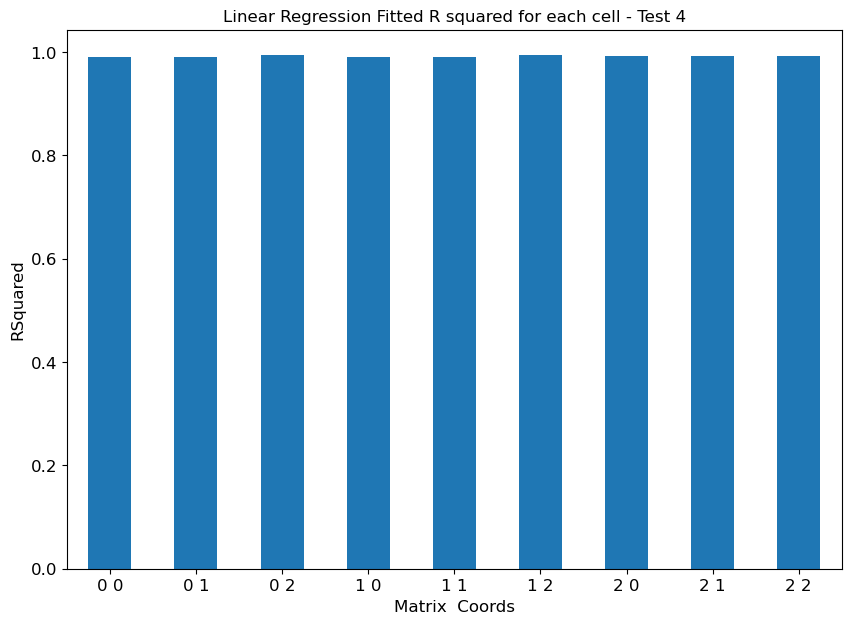

Generated RSquared values for Linear Regression each  element -> the mean of these values: 0.9922
Generated RSquared values for Linear Regression each  element -> the Standard Deviation of these values: 0.0013


In [228]:
cellList = []  
test4fitlist = []
for x in test4fit:
    cellList.append(x[0])
    test4fitlist.append(x[1])
        
test4df = pd.DataFrame.from_dict({
    'Cell': cellList,
    'RSquaredFit': test4fitlist
})
ax = test4df.plot(kind='bar', title ="Linear Regression Fitted R squared for each cell - Test 4", x="Cell", figsize=(10, 7), legend=False, fontsize=12, rot=0)
ax.set_xlabel("Matrix  Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

Test4mean = pd.DataFrame(test4fit, columns=['Matrix  Coords', 'RSquared']).loc[:, 'RSquared'].mean()
Test4std = pd.DataFrame(test4fit, columns=['Matrix  Coords', 'RSquared']).loc[:, 'RSquared'].std() 

print('Generated RSquared values for Linear Regression each  element -> the mean of these values: ' + str(np.round(Test4mean,digitsToRoundResults)))
print('Generated RSquared values for Linear Regression each  element -> the Standard Deviation of these values: ' + str(np.round(Test4std,digitsToRoundResults)))

In [ ]:
#ANALYSIS

<b><font style='color:blue'>Test 4 does not produce a sufficient rsquared value for a linear regression - However a better R squared average then test 2. Different sets of matrices produce different results but generally the mean is about 0.042<br><br>The mean for Test 3 is around 0.028</font></b>

## Step 9: Conclusion

In [ ]:
#RESULTS SUMMARY FROM TEST 1, TEST 2, TEST 3, and TEST 4

In [ ]:
#Show How R Squared varies by cell for each Test

In [ ]:
results_df2 = pd.DataFrame.from_dict({
    'Cell': ['00', '01', '02', '10', '11', '12', '20', '21', '22'],
    'Test1': [test1fit[0][1],test1fit[1][1], test1fit[2][1], test1fit[3][1],test1fit[4][1],test1fit[5][1],test1fit[6][1],test1fit[7][1],test1fit[8][1]],
    'Test2': [test2fit[0][1],test2fit[1][1], test2fit[2][1], test2fit[3][1],test2fit[4][1],test2fit[5][1],test2fit[6][1],test2fit[7][1],test2fit[8][1]],
    'Test3': [test3fit[0][1],test3fit[1][1], test3fit[2][1], test3fit[3][1],test3fit[4][1],test3fit[5][1],test3fit[6][1],test3fit[7][1],test3fit[8][1]],
    'Test4': [test4fit[0][1],test4fit[1][1], test4fit[2][1], test4fit[3][1],test4fit[4][1],test4fit[5][1],test4fit[6][1],test4fit[7][1],test4fit[8][1]],
})
results_df2.plot(kind='bar' , x='Cell',ylabel='R Squared', title='Fitted R Squared Values by Cell - Random Seed '+str(randomSeed), figsize=(10,5), rot=0);

We can see a general pattern accross each cell across tests, a cell r squared value relates to other cells in the same way for each test. 

This pattern exists generally for different random seeds

In [ ]:
#Show the mean of the test group for all cells for each test

In [ ]:
results_df = pd.DataFrame.from_dict({
    'Test': ['Test 1', 'Test 2', 'Test 3', 'Test 4'],
    'MeanRSquared': [Test1mean, Test2mean, Test3mean, Test4mean],
    'StdRSquared': [Test1std, Test2std, Test3std, Test4std]
})
results_df.plot(kind='bar' , x='Test', ylabel='RSquared', title='Cells Grouped Mean - Random Seed '+str(randomSeed), figsize=(7,5), rot=0);

<b><font style='color:blue'>Regardless of the random seed we always see a nice increase in the RSquared Value indicating that the fourth test has the best parameters for a linear regression. The Standard Deviation always increases or remains constant accross all cells</font></b>

<b><font style='color:blue'>The Test4 parameters are: linear regression with each matrix element and all possible combinations of one matrix element squared and multiplied by every other matrix element and the cube of each matrix element</font></b>

<b><font style='color:red'>Please see the github file 3x3TestResults.pdf with graphs of the results from this notebook running with various random seeds</font></b>